In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import load_model



In [2]:
df=pd.read_csv('CSV/Google.csv')
df['Date']=pd.to_datetime(df['Date'])


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1761 non-null   datetime64[ns]
 1   Open       1761 non-null   float64       
 2   High       1761 non-null   float64       
 3   Low        1761 non-null   float64       
 4   Close      1761 non-null   float64       
 5   Adj Close  1761 non-null   float64       
 6   Volume     1761 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 96.4 KB


In [4]:
#Chuẩn hoá dữ liệu
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
scaled_data

array([[0.01275147],
       [0.00842718],
       [0.0037195 ],
       ...,
       [0.97903276],
       [0.96622247],
       [0.96667041]])

In [5]:
#Tạo tập train và test
X = scaled_data
y = scaled_data

X = np.reshape(X, (X.shape[0], 1, X.shape[1])) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model=Sequential(
[
    LSTM(units=60,input_shape=(X.shape[1],1),return_sequences=True),
    LSTM(units=50,return_sequences=True),
    LSTM(units=30,return_sequences=True),
    LSTM(units=20,return_sequences=True),
    LSTM(10),
    Dense(units=1),
])

d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 60)          │        14,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 50)          │        22,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 1, 30)          │         9,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 1, 20)          │         4,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 10)             │         1,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,131 (203.64 KB)

 Trainable params: 52,131 (203.64 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer = "adam",loss='mean_squared_error')


In [9]:
model.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)


Epoch 1/50
1408/1408 - 10s - 7ms/step - loss: 0.0098
Epoch 2/50
1408/1408 - 4s - 3ms/step - loss: 4.0154e-04
Epoch 3/50
1408/1408 - 3s - 2ms/step - loss: 3.1733e-04
Epoch 4/50
1408/1408 - 4s - 3ms/step - loss: 3.7046e-04
Epoch 5/50
1408/1408 - 4s - 3ms/step - loss: 1.7551e-04
Epoch 6/50
1408/1408 - 3s - 2ms/step - loss: 1.1384e-04
Epoch 7/50
1408/1408 - 4s - 3ms/step - loss: 1.8752e-04
Epoch 8/50
1408/1408 - 4s - 3ms/step - loss: 1.0532e-04
Epoch 9/50
1408/1408 - 4s - 3ms/step - loss: 1.8188e-04
Epoch 10/50
1408/1408 - 3s - 2ms/step - loss: 6.0252e-05
Epoch 11/50
1408/1408 - 4s - 3ms/step - loss: 2.3433e-04
Epoch 12/50
1408/1408 - 3s - 2ms/step - loss: 1.5770e-04
Epoch 13/50
1408/1408 - 4s - 3ms/step - loss: 6.6497e-05
Epoch 14/50
1408/1408 - 4s - 3ms/step - loss: 1.4725e-04
Epoch 15/50
1408/1408 - 3s - 2ms/step - loss: 1.6598e-04
Epoch 16/50
1408/1408 - 3s - 2ms/step - loss: 7.1796e-05
Epoch 17/50
1408/1408 - 4s - 2ms/step - loss: 9.9319e-05
Epoch 18/50
1408/1408 - 4s - 3ms/step - los

In [10]:
#model.save('lstm_model.h5')

In [11]:
loaded_model = load_model('lstm_model.h5')

In [12]:
import matplotlib.pyplot as plt

# Dự Đoán
predictions = loaded_model.predict(X)

# Chuyển dữ liệu về ban đầu
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], y_actual, label='Actual', color='blue')
plt.plot(df['Date'], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Stock By LTSM')
plt.legend()
plt.show()

# Đánh giá mô hình
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, predictions)
r2 = r2_score(y_actual, predictions)

# In kết quả đánh giá
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R2 Score: ", r2)


NameError: name 'loaded_model' is not defined

### RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
Model3 = Sequential(
[
    SimpleRNN(units=30, input_shape=(X.shape[1], 1), activation='relu', return_sequences=True),
    SimpleRNN(units=20, activation='relu', return_sequences=True),
    SimpleRNN(units=10, activation='relu'),
    Dense(units=1)
])

d:\Python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
Model3.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 30)          │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 1, 20)          │         1,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,301 (8.99 KB)

 Trainable params: 2,301 (8.99 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model3.compile(optimizer = "adam",loss='mean_squared_error')


In [ ]:
#Model3.fit(X_train, y_train, epochs=50, batch_size=1, verbose=2)


In [ ]:
#Model3.save('RNN_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model3 = load_model('RNN_model.h5')

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


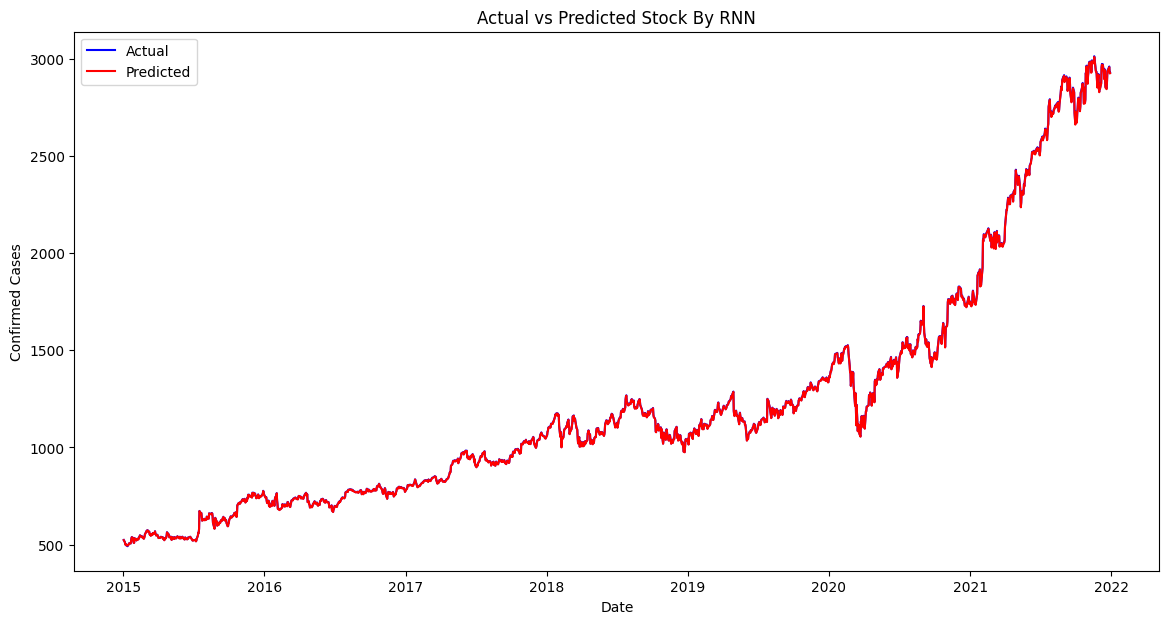

Mean Squared Error (MSE):  3.286940891250584
Root Mean Squared Error (RMSE):  1.8129922479841396
Mean Absolute Error (MAE):  1.6755161055419425
R2 Score:  0.9999912056936733


In [ ]:
import matplotlib.pyplot as plt

# Dự Đoán
predictions = loaded_model3.predict(X)

# Chuyển dữ liệu về ban đầu
predictions = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(y)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], y_actual, label='Actual', color='blue')
plt.plot(df['Date'], predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Stock By RNN')
plt.legend()
plt.show()

# Đánh giá mô hình
mse = mean_squared_error(y_actual, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_actual, predictions)
r2 = r2_score(y_actual, predictions)

# In kết quả đánh giá
print("Mean Squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Error (MAE): ", mae)
print("R2 Score: ", r2)


### Kết Luận


| Model   | MSE      | MAE      | R2 Score | RMSE  |
|---------|----------|----------|----------|--------|
| LTSM | 112.66388042001495 | 5.379887753193098 | 0.9996985644983746 |10.614324303506793|
| RNN | 3.286940891250584 | 1.6755161055419425 | 0.9999912056936733 |1.8129922479841396|


- Về MSE: LSTM có xu hướng dự đoán sai lệch hơn so với mô hình RNN.
- Về MAE: LSTM có xu hướng dự đoán sai lệch hơn so với mô hình RNN.
- Về RMSE:  LSTM có khả năng giải thích dữ liệu tốt hơn mô hình RNN.
- Về R2 Score:LSTM có xu hướng dự đoán sai lệch hơn so với mô hình RNN.


Dựa trên ba chỉ số MSE, MAE và RMSE, có thể thấy rằng mô hình RNN có hiệu suất tốt hơn mô hình LSTM. 
Tuy nhiên, mô hình LSTM có giá trị R2 Score cao hơn, cho thấy khả năng giải thích dữ liệu tốt hơn.